array([[9.99000000e+02, 9.98514108e+02, 9.97804454e+02, ...,
        2.10237697e-06, 2.10151354e-06, 2.10066754e-06],
       [1.00000000e+00, 1.46156670e+00, 2.13567260e+00, ...,
        1.03725199e+00, 1.01671302e+00, 9.96580759e-01],
       [0.00000000e+00, 2.43248104e-02, 5.98729480e-02, ...,
        9.98962746e+02, 9.98983285e+02, 9.99003417e+02]])

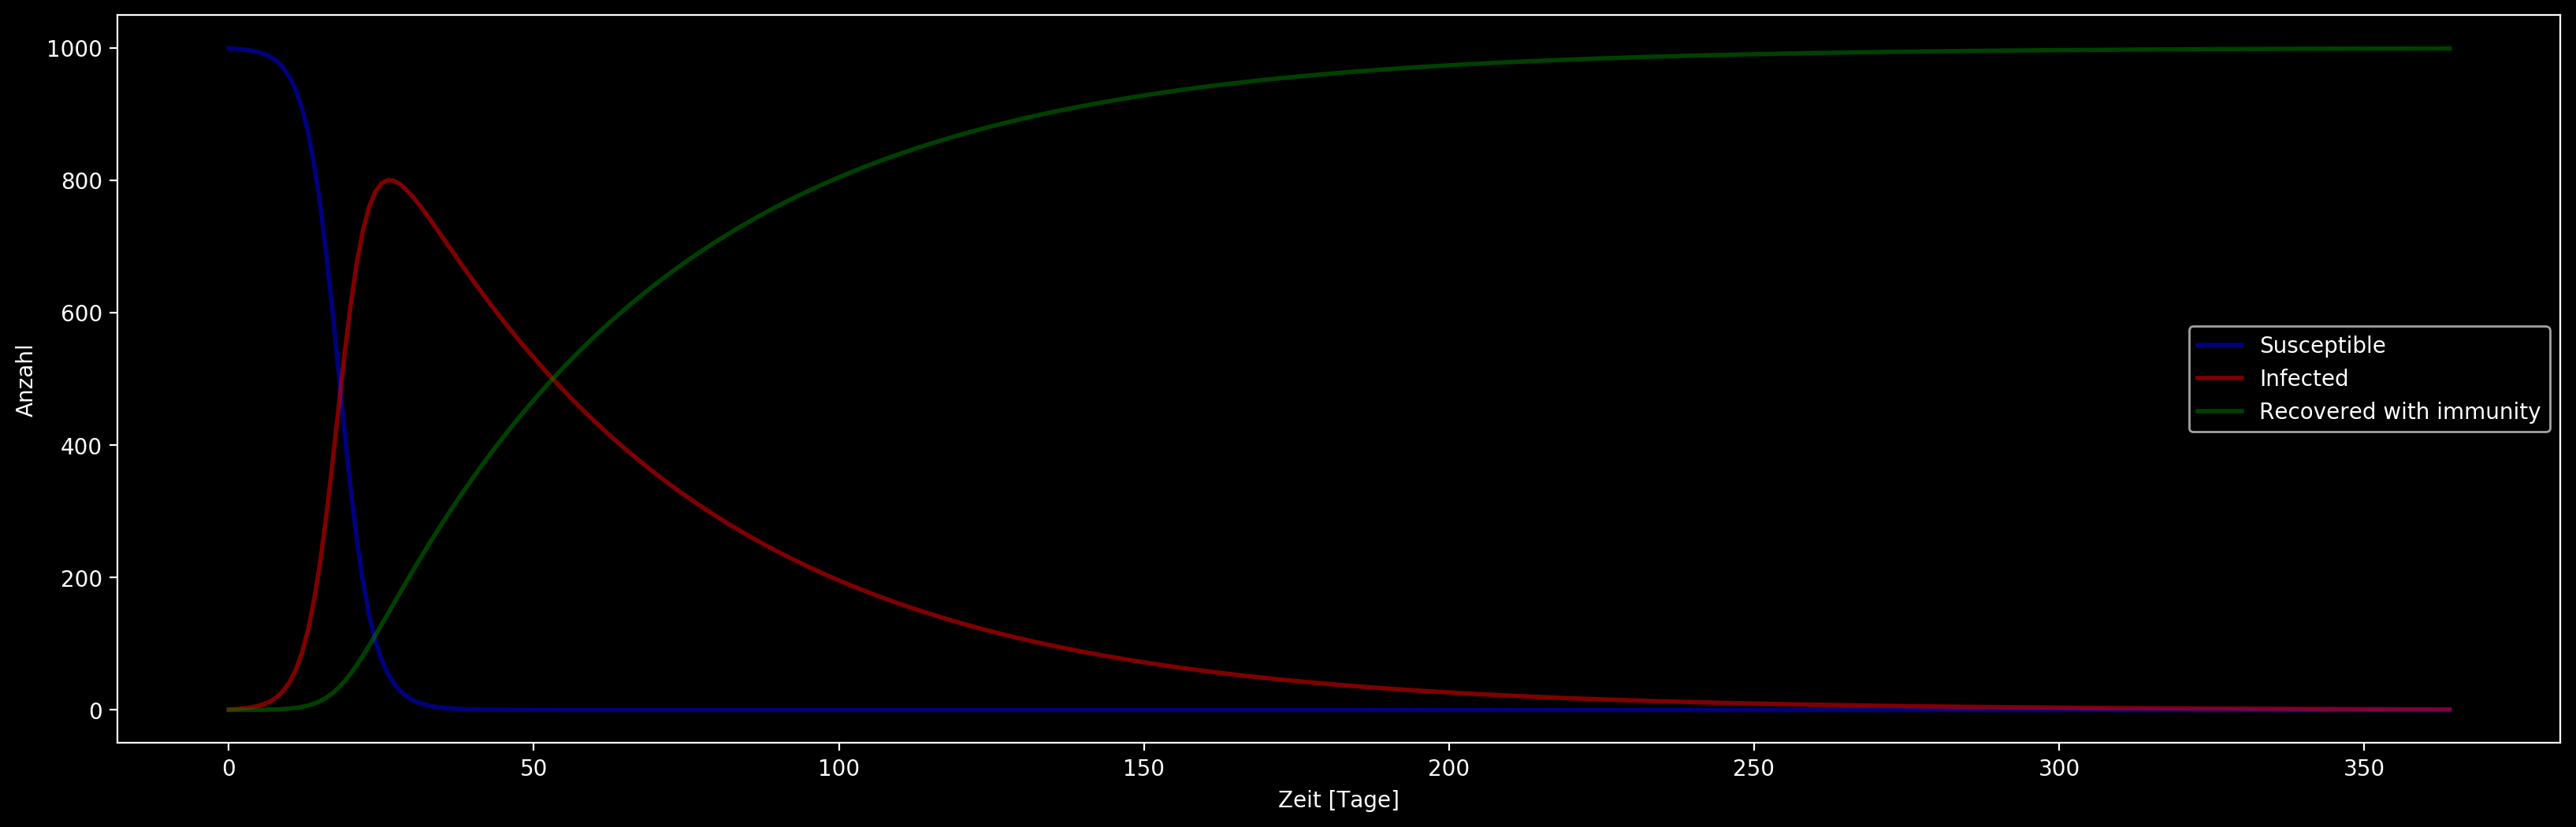

In [2]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

S0, I0, R0 = 999, 1, 0
alpha, beta  = 4e-4, 2e-2

def deriv(u, t, alpha, beta):
   S, I, R = u
   dSdt = -alpha * S * I   
    #das delta der sanes, die negativen neuinfizierten
    #alpha ist rate der neuinfektionen, Is stecken Ss mit dieser rate an, dadurch nimmt ie Zahl ser Ss ab, diese abnahme ist das delta
   dIdt = alpha * S * I - beta  * I
#das delta der infizierten, anzahl neuinfizierte - ausgeschiedene infizierte, beta ist die ausscheiderate
#das sind die neu infizierten
   
   dRdt = beta * I
#ausgeschiedene beta ausscheidungerate angewand auf die infizerten
   return dSdt, dIdt, dRdt


y0 = S0, I0, R0
T = np.linspace(0, 364, 365)

ret = odeint(deriv, y0, T, args=(alpha, beta))
df= pd.DataFrame(ret)
display(ret.T)

S, I, R = ret.T
plt.rcParams["figure.figsize"] = (20,6)
plots = plt.plot(T, S, 'b', alpha=0.5, lw=2, label='Susceptible') \
   + plt.plot(T, I, 'r', alpha=0.5, lw=2, label='Infected') \
   + plt.plot(T, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Zeit [Tage]')
plt.ylabel('Anzahl')
plt.legend(handles=plots)
plt.show()











